# HW2 E24054025 陳彥溥

In [2]:
import pandas as pd
import seaborn as sns
dataset=pd.read_csv("Reviews.csv")[:10000]

In [3]:
index = dataset["UserId"].value_counts().index

In [4]:
reviewers = dataset.groupby(['UserId','ProfileName']).size().sort_values(ascending=False).reset_index(name='Score Count')

In [6]:
sector = dataset.groupby(['UserId'])
k =[]
for i in index:
    k.append(sector.get_group(i)["Score"].mean())
reviewers['means']=k


In [8]:
reviewers.head(10)

,UserId,ProfileName,Score Count,means
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,3.142857
5,A3NHUQ33CFH3VM,Citizen John,7,4.714286
6,A3PJZ8TU8FDQ1K,Jared Castle,7,4.428571
7,A3TX6CWSZL02PW,"LaVerne "":LaVerne""",6,5.000000
8,AQQLWCMRNDFGI,Steven A. Peterson,6,4.166667
9,A2R6RA8FRBS608,Matthew G. Sherwin,6,4.500000


# 2. Plot score distribution for the user with the most number of reviews

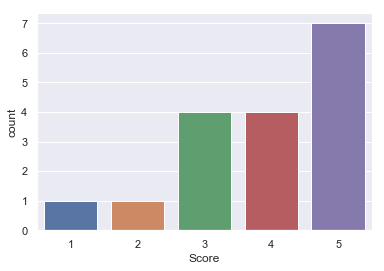

In [9]:
scores = sector.get_group(index[0])["Score"]
sns.set()
sns.countplot(scores)

# 3. Plot pandas Series DataFrame (Time->Date)


In [28]:
read = dataset['Time'].sort_values(ascending=True)/31556926+1970
from collections import defaultdict
from bisect import bisect_left

def count_intervals(sequence, intervals):
    count = defaultdict(int)
    intervals.sort()
    for item in sequence:
        pos = bisect_left(intervals, item)
        if pos == len(intervals):
            count[None] += 1
        else:
            count[intervals[pos]] += 1
    return count
x = [i for i in range(2000,2014,1)]
z = count_intervals(read,x)
d = []
for i in x:
    d.append(z[i])

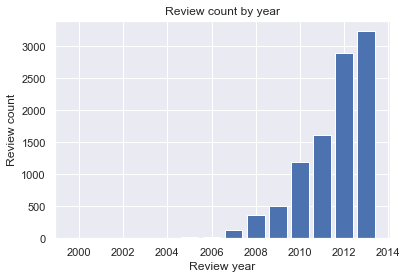

In [33]:
import matplotlib.pyplot as plt
plt.title('Review count by year')
plt.xlabel('Review year')
plt.ylabel('Review count')
plt.bar(x,d)
plt.show()
#sns.set()

# 4. Plot HeatMap using seaborn

In [31]:
corr = dataset.corr()

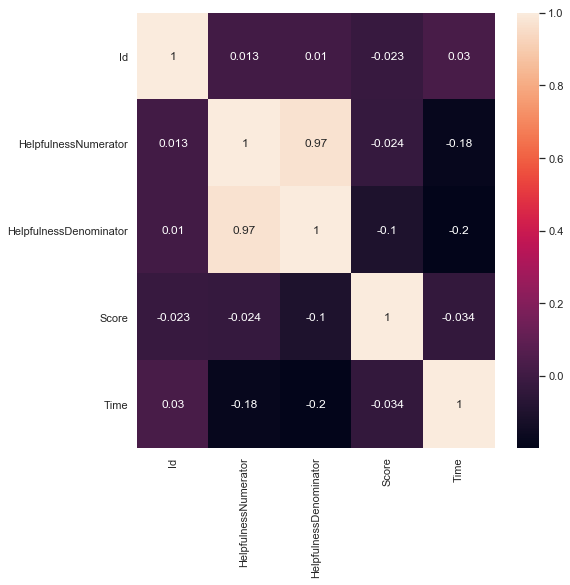

In [39]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr,annot=True)

# 5. Helpful percent

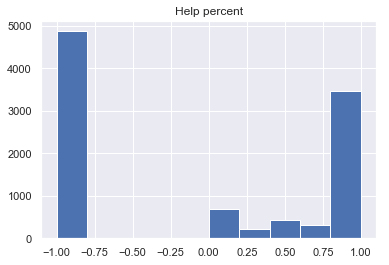

In [55]:
def percent(row):
    if row['HelpfulnessNumerator'] <= row['HelpfulnessDenominator'] and row['HelpfulnessDenominator']!= 0:
        return row['HelpfulnessNumerator']/row['HelpfulnessDenominator']
    elif row['HelpfulnessNumerator'] == 0 and row['HelpfulnessDenominator'] == 0:
        return -1
    else:
        return 0
dataset['Help percent'] = dataset.apply(percent,axis = 1)
plt.hist(dataset['Help percent'])
plt.title('Help percent')
plt.show()